In [1]:
print("raman")

raman


In [2]:
# Loading the required packages:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import savgol_filter, general_gaussian
import sklearn.linear_model as linear_model

In [3]:
def Gauss(x, mu, sigma, A = 1):
    # This def returns the Gaussian function of x
    # x is an array
    # mu is the expected value
    # sigma is the square root of the variance
    # A is a multiplication factor
    
    gaussian = A/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2)
    
    return gaussian

In [4]:
# X-axis (Wavelengths)
x_range =  np.linspace(650, 783, 1024)

# Let's create three different components

# Component A
mu_a1 = 663
sigma_a1 = 1
intensity_a1 = 1

mu_a2 = 735
sigma_a2 = 1
intensity_a2 = 0.2

mu_a3 = 771
sigma_a3 = 1
intensity_a3 = 0.3

gauss_a =  Gauss(x_range, mu_a1, sigma_a1, intensity_a1) + Gauss(x_range, mu_a2, sigma_a2, intensity_a2) + Gauss(x_range, mu_a3, sigma_a3, intensity_a3)

In [5]:
# Component B
mu_b = 700
sigma_b = 1
intensity_b = 0.2

mu_b1 = 690
sigma_b1 = 2
intensity_b1 = 0.5

mu_b2 = 710
sigma_b2 = 1
intensity_b2 = 0.75

mu_b3 = 774
sigma_b3 = 1.5
intensity_b3 = 0.25

gauss_b = Gauss(x_range, mu_b, sigma_b, intensity_b) + Gauss(x_range, mu_b1, sigma_b1, intensity_b1) + Gauss(x_range, mu_b2, sigma_b2, intensity_b2) + Gauss(x_range, mu_b3, sigma_b3, intensity_b3)


In [6]:
# Component C
mu_c1 = 660
sigma_c1 = 1
intensity_c1 = 0.05

mu_c2 = 712
sigma_c2 = 4
intensity_c2 = 0.7

gauss_c = Gauss(x_range, mu_c1, sigma_c1, intensity_c1) + Gauss(x_range, mu_c2, sigma_c2, intensity_c2)

In [7]:
# This is how they normalize each components
component_a = gauss_a/np.max(gauss_a)
component_b = gauss_b/np.max(gauss_b)
component_c = gauss_c/np.max(gauss_c)

# maybe I can set the simulation of overall spectra from skin
# glucose, lipid , some component that have affects

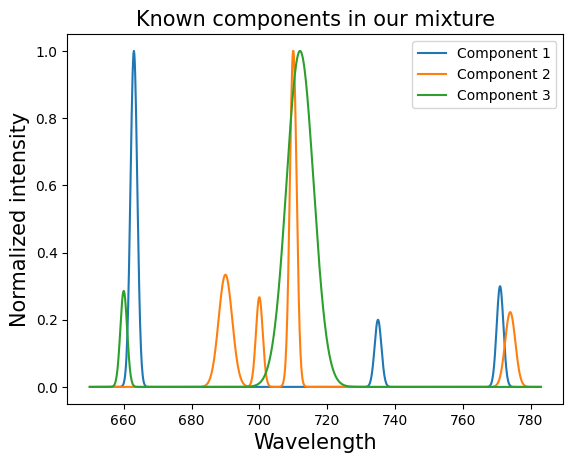

In [8]:
# How do they look?
plt.plot(x_range, component_a, label = 'Component 1')
plt.plot(x_range, component_b, label = 'Component 2')
plt.plot(x_range, component_c, label = 'Component 3')
plt.title('Known components in our mixture', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Normalized intensity', fontsize = 15)
plt.legend()
plt.show()